This notebook will experiment with *associate memory problem.* A distorted image will be fed to a network which have stored patterns via hebbs rule.

# Set up

- Visualize the stored patterns/digits and the distorted patterns
- Define constants

<Figure size 360x216 with 0 Axes>

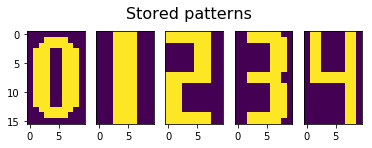

<Figure size 360x216 with 0 Axes>

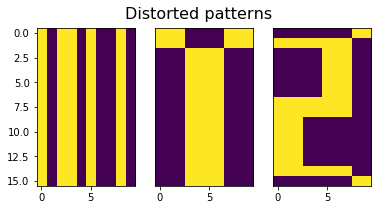

In [1]:

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline





############################# Initializing the digits ############################################


storedPatterns = [np.asarray([[ -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
                [ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],
                [ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],
                [ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],
                [ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],
                [ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],
                [ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
                [ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] ]),
                np.asarray([[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
                [ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
                [ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
                [ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
                [ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
                [ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
                [ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
                [ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1]]),
                  np.asarray([[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
                [ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],
                [ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],
                [ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
                [ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
                [ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
                [ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
                [ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1] ]),
                  np.asarray([[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, 1, -1],
                [ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],
                [ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],
                [ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
                [ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],
                [ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],
                [ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],
                [ -1, -1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1] ]),
                  np.asarray([[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],
                [ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],
                [ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],
                [ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, 1, 1, 1, 1, 1, 1, -1],
                [ -1, 1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],
                [ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],
                [ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],
                [ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1] ])
                 ]



distortedPatterns = [np.asarray([[1, -1, 1, 1, -1, 1, -1, -1, 1, -1], [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], 
                    [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], 
                    [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], 
                    [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], 
                    [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], 
                    [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], 
                    [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], 
                    [1, -1, 1, 1, -1, 1, -1, -1, 1, -1], [1, -1, 1, 1, -1, 1, -1, -1, 1, -1]]),
                     np.asarray([[1, 1, 1, -1, -1, -1, -1, 1, 1, 1], [1, 1, 1, -1, -1, -1, -1, 1, 1, 1], 
                    [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], 
                    [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], 
                    [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], 
                    [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], 
                    [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], 
                    [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], 
                    [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]]),
                     np.asarray([[-1, -1, -1, -1, -1, -1, -1, -1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, -1, -1], 
                    [-1, -1, -1, -1, -1, 1, 1, 1, -1, -1], [-1, -1, -1, -1, -1, 1, 1, 1, -1, -1], 
                    [-1, -1, -1, -1, -1, 1, 1, 1, -1, -1], [-1, -1, -1, -1, -1, 1, 1, 1, -1, -1],
                    [-1, -1, -1, -1, -1, 1, 1, 1, -1, -1], [1, 1, 1, 1, 1, 1, 1, 1, -1, -1], 
                    [1, 1, 1, 1, 1, 1, 1, 1, -1, -1], [1, 1, 1, -1, -1, -1, -1, -1, -1, -1], 
                    [1, 1, 1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, -1, -1, -1, -1, -1, -1, -1], 
                    [1, 1, 1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, -1, -1, -1, -1, -1, -1, -1], 
                    [1, 1, 1, 1, 1, 1, 1, 1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, 1, 1]])
                    ]






N_neurons = len(storedPatterns[0].flatten())



############################## Plotting ###################################



######### Plot each stored patttern
plt.figure(figsize=(5,3))
fig = plt.figure()
fig.suptitle('Stored patterns', size=16, y=0.75)

pltSubplotIndex = 1
for pattern in storedPatterns:  
    plt.subplot(1,len(storedPatterns),pltSubplotIndex)
    plt.imshow(pattern)
    if(pltSubplotIndex> 1):
        plt.yticks([])
    pltSubplotIndex += 1
plt.show()



######## Plot each distorted pattern 
plt.figure(figsize=(5,3))
fig = plt.figure()
fig.suptitle('Distorted patterns', size=16, y=.85)
pltSubplotIndex = 1
for distPattern in distortedPatterns:  
    plt.subplot(1,len(distortedPatterns),pltSubplotIndex)
    plt.imshow(distPattern)
    if(pltSubplotIndex> 1):
        plt.yticks([])
    pltSubplotIndex += 1
plt.show()


# Hebbs rule

*Hebbs rule* will be used to store the patterns in the network. Each element in the weight matrix will be assigned as follows


\begin{equation}
w_{ij} = \frac{1}{N} \sum_{\mu=1}^{p}x_i^{(\mu)}x_j^{(\mu)} \quad \text{where} \quad \theta_i=0, \quad p=5
\end{equation}

$p$ is refering to the amount of stored patters (digits 0-4) and $x_i^{(\mu)}$ is referring to bit $i$ for pattern $\mu$

In [2]:
def generateWeightMatrix(storedPatterns):  
    W = np.zeros((N_neurons, N_neurons))                 
    for i in range(np.size(W,0)):               
        for j in range(np.size(W,1)):           
            Sum = 0
            if(j==i):                          
                W[i][j]= 0
            else:
                for u in range(len(storedPatterns)):             
                     Sum = Sum + storedPatterns[u][i]*storedPatterns[u][j]
                W[i][j] = Sum/N_neurons
    return W



for i,pattern in enumerate(storedPatterns): # Flatten out the arrays
        storedPatterns[i] = pattern.flatten()
print(np.asarray(storedPatterns).shape)

Weights = generateWeightMatrix(storedPatterns)


(5, 160)


# Running the simulation

Let $S_i$ be the state of neuron $i$. The neurons will be updated in order (in ascending order, 1,2,...160) according to the following rule

\begin{equation}
S_i \leftarrow{} \text{sgn} \bigg( \sum_{j} w_{ij} S_j  \bigg) 
\end{equation}

An *epoch* of updates will occur when each neuron has been updated once. The simulation will stop when no bit has changed from an previous epoch. This is the point when the network has reached a *steady state* <br/>

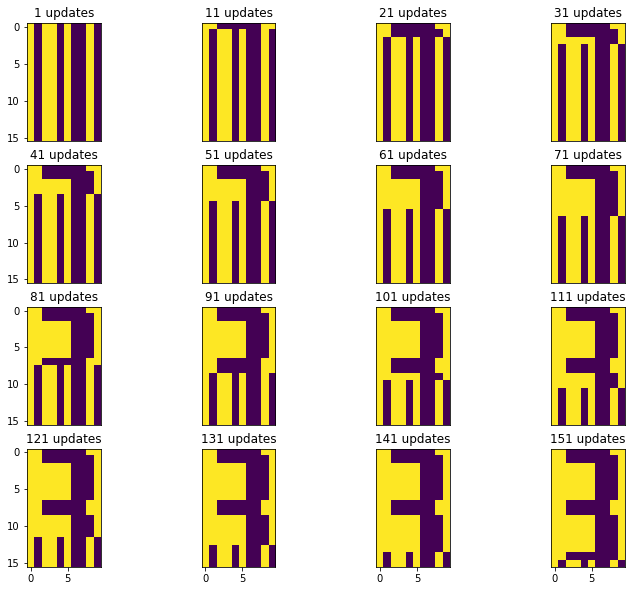

Finished with epoch number 1


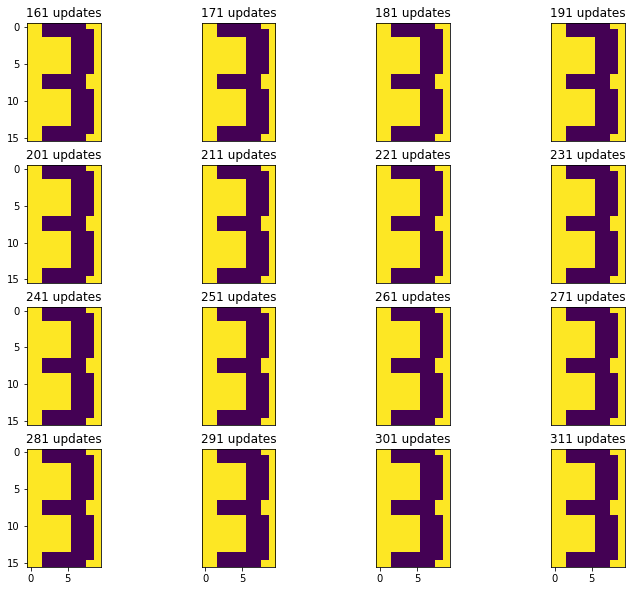

Finished with epoch number 2


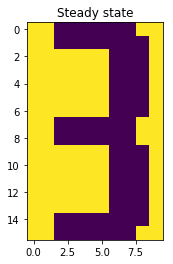

State of neurons: [[ 1  1 -1 -1 -1 -1 -1 -1  1  1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1  1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1 -1 -1 -1 -1 -1 -1  1  1]
 [ 1  1 -1 -1 -1 -1 -1 -1  1  1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1  1]
 [ 1  1 -1 -1 -1 -1 -1 -1  1  1]]


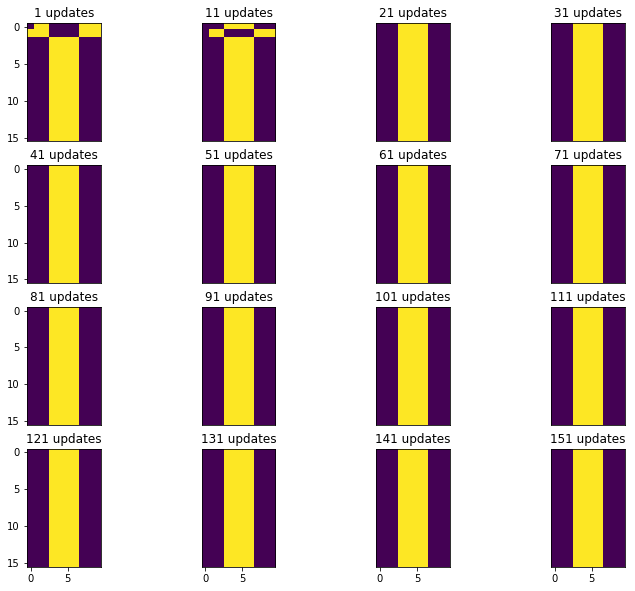

Finished with epoch number 1


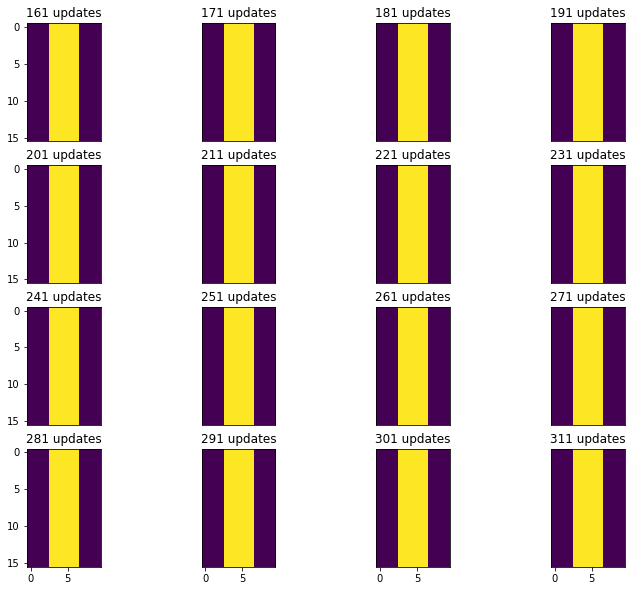

Finished with epoch number 2


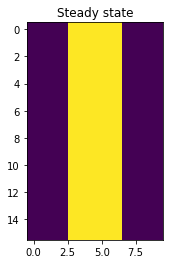

State of neurons: [[-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1  1  1  1  1 -1 -1 -1]]


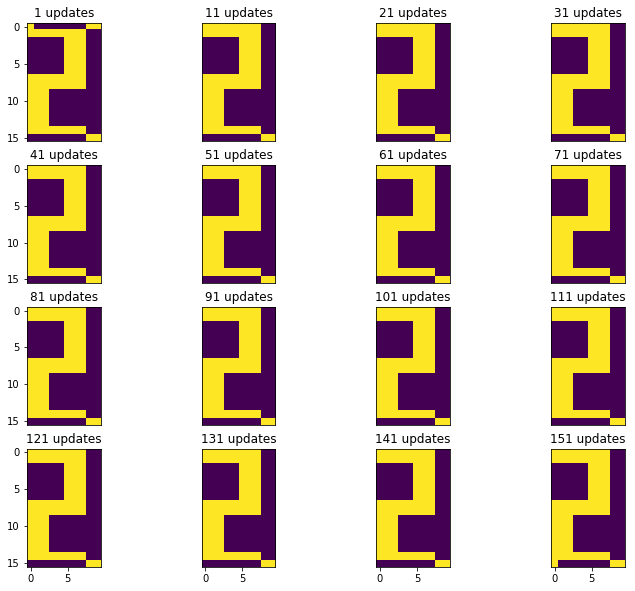

Finished with epoch number 1


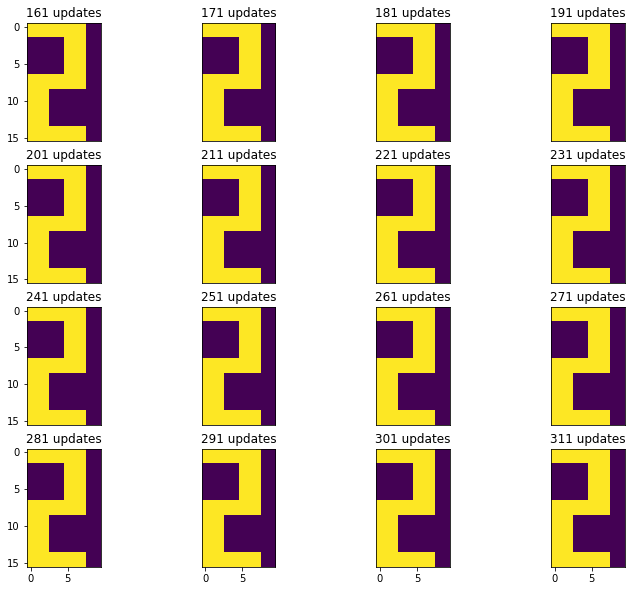

Finished with epoch number 2


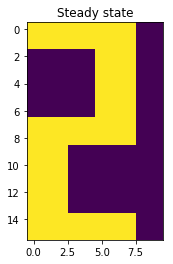

State of neurons: [[ 1  1  1  1  1  1  1  1 -1 -1]
 [ 1  1  1  1  1  1  1  1 -1 -1]
 [-1 -1 -1 -1 -1  1  1  1 -1 -1]
 [-1 -1 -1 -1 -1  1  1  1 -1 -1]
 [-1 -1 -1 -1 -1  1  1  1 -1 -1]
 [-1 -1 -1 -1 -1  1  1  1 -1 -1]
 [-1 -1 -1 -1 -1  1  1  1 -1 -1]
 [ 1  1  1  1  1  1  1  1 -1 -1]
 [ 1  1  1  1  1  1  1  1 -1 -1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1 -1 -1]
 [ 1  1  1  1  1  1  1  1 -1 -1]]


In [28]:
import time
import pyprind

for distPattern in distortedPatterns:
    neurons_currentState = distPattern.flatten()
    epochs = 1
    numberOfUpdates = 1
    while(True): # Loop until the network has reached steady state
        
        epoch_current_state = np.copy(neurons_currentState)
        index = 0
        pltSubplotIndex = 1
        plt.figure(figsize=(12,10))
        
        for i in range(N_neurons):   #Perform an epoch
            
            #Perform one update on a randomly selected neuron
            neurons_updatedState = neurons_currentState
            updateValue = np.sign(np.dot(Weights[i,:], neurons_currentState.T))
            if(updateValue==0):
                updateValue = 1
            neurons_updatedState[i] = updateValue
            neurons_currentState = np.copy(neurons_updatedState)
            
            
            #Plotting
            if(i%10==0):
                fig.suptitle('Main title')
                plt.subplot(4,4,pltSubplotIndex)
                plt.imshow(neurons_currentState.reshape(16,10))
                if(pltSubplotIndex%4-1 != 0):
                    plt.yticks([])
                if(pltSubplotIndex < 13):
                    plt.xticks([])
                plt.title('{0} updates'.format(numberOfUpdates))
                pltSubplotIndex += 1
            numberOfUpdates +=1
    
        plt.show()
        
        print('Finished with epoch number {0}'.format(epochs))
        
        epochs += 1
        if((neurons_currentState==epoch_current_state).all()): # Check steady state
            break;
        
    plt.imshow(neurons_currentState.reshape(16,10))
    plt.title('Steady state')
    plt.show()
    print('State of neurons: {0}'.format(neurons_currentState.reshape(16,10)))
    
    

## Conclusions

- The first distorted pattern converged to the *inverted pattern* number digit number three
- The other two distorted pattern converged correctly to stored patterns (stored pattern corresponding to digit number 1 and 2)